In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("missing_treated.csv")

In [3]:
df.head()

,property_type,society,sector,price,persf_area,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,apna enclave,sector 3,0.50,7692.0,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,smart world orchard,sector 61,1.47,12250.0,2.0,2.0,2,2.0,Under Construction,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,parkwood westend,sector 92,0.70,5204.0,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(3577, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3577 non-null   object 
 1   society          3577 non-null   object 
 2   sector           3577 non-null   object 
 3   price            3577 non-null   float64
 4   persf_area       3577 non-null   float64
 5   bedroom          3577 non-null   float64
 6   bathroom         3577 non-null   float64
 7   balcony          3577 non-null   object 
 8   floorNum         3577 non-null   float64
 9   agePossession    3577 non-null   object 
 10  built_up_area    3577 non-null   float64
 11  study room       3577 non-null   float64
 12  servant room     3577 non-null   float64
 13  store room       3577 non-null   float64
 14  pooja room       3577 non-null   float64
 15  others           3577 non-null   float64
 16  furnishing_type  3577 non-null   float64
 17  luxury_score  

In [7]:
sdf = df.drop(columns=['society','persf_area'])

In [8]:
sdf.head()

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,flat,sector 61,1.47,2.0,2.0,2,2.0,Under Construction,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Luxury score

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

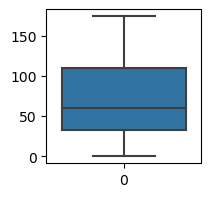

In [15]:
plt.subplots(figsize=(2,2))
sns.boxplot(df['luxury_score'])
plt.plot

In [16]:
def luxury_class(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None 

In [17]:
sdf['luxury_class'] = sdf['luxury_score'].apply(luxury_class)

In [18]:
sdf.head()

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_class
0,flat,sector 7,0.45,2.0,2.0,1,4.0,Relatively New,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,Low
1,flat,sector 3,0.50,2.0,2.0,1,1.0,Old Property,722.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,Low
2,flat,sohna road,0.40,2.0,2.0,3,12.0,New Property,661.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,Low
3,flat,sector 61,1.47,2.0,2.0,2,2.0,Under Construction,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,76.0,Medium
4,flat,sector 92,0.70,2.0,2.0,3,5.0,Under Construction,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


## Floornumber

In [19]:
def floor_div(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [20]:
sdf['floor_class'] = sdf['floorNum'].apply(floor_div)

In [21]:
sdf.drop(columns=['floorNum','luxury_score'],inplace=True)

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
cdf= sdf.copy()

cat_cols = sdf.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in cat_cols:
    oe = OrdinalEncoder()
    cdf[col] = oe.fit_transform(cdf[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
x_label = cdf.drop('price', axis=1)
y_label = cdf['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [23]:
x_label

,property_type,sector,bedroom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_class,floor_class
0,0.0,79.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,0.0,34.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.0,111.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,69.0,2.0,2.0,2.0,4.0,1333.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,0.0,105.0,2.0,2.0,3.0,4.0,1217.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,1.0,64.0,3.0,3.0,3.0,0.0,1650.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0
3573,1.0,31.0,4.0,4.0,3.0,0.0,1800.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3574,1.0,30.0,3.0,2.0,3.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3575,1.0,31.0,3.0,3.0,2.0,0.0,1350.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0


In [24]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3572    4.75
3573    5.50
3574    4.25
3575    4.50
3576    3.25
Name: price, Length: 3577, dtype: float64

# 1 - Correlation

[]

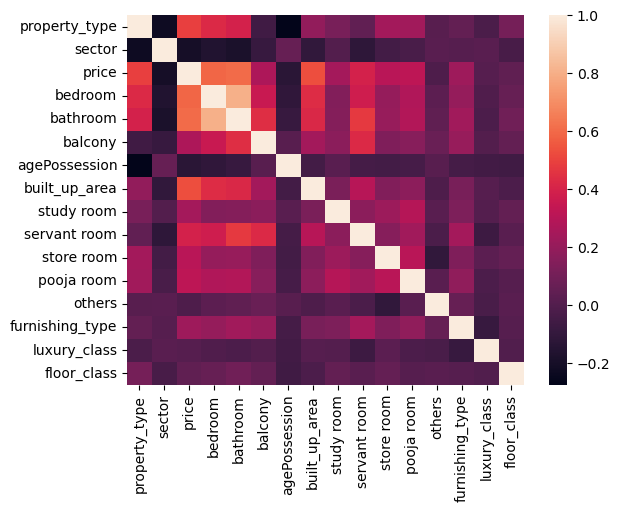

In [50]:
sns.heatmap(cdf.corr())
plt.plot()

In [51]:
df1 = cdf.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
df1

,feature,corr_coeff
0,sector,-0.199371
1,price,1.000000
2,bedroom,0.590010
3,bathroom,0.604652
4,balcony,0.269496
5,agePossession,-0.133460
6,built_up_area,0.530340
7,study room,0.245271
8,servant room,0.395119
9,store room,0.307332


# 2 - Feature Importance

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
df2 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

df2

,feature,rf_importance
6,built_up_area,0.646012
1,sector,0.105848
0,property_type,0.105712
2,bedroom,0.025595
3,bathroom,0.021569
8,servant room,0.020278
4,balcony,0.014298
5,agePossession,0.013937
12,furnishing_type,0.010265
9,store room,0.008944


## Gradboost Feature Importance

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

# Extract feature importance scores for label encoded data
df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

df3

,feature,gb_importance
6,built_up_area,0.676279
1,sector,0.104598
0,property_type,0.096845
2,bedroom,0.037171
3,bathroom,0.033981
8,servant room,0.030017
9,store room,0.007429
5,agePossession,0.005404
7,study room,0.003707
12,furnishing_type,0.002958


## 4 - Lasso coefficent

In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(x_scaled, y_label)

# Extract coefficients
df4 = pd.DataFrame({
    'feature': x_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

df4

,feature,lasso_coeff
6,built_up_area,0.772454
0,property_type,0.732445
3,bathroom,0.468394
2,bedroom,0.325176
8,servant room,0.320759
9,store room,0.232360
7,study room,0.217808
12,furnishing_type,0.164170
10,pooja room,0.102630
13,luxury_class,0.067846


# 5 - Linear Regression params

In [55]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_scaled, y_label)

# Extract coefficients
df5 = pd.DataFrame({
    'feature': x_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

df5

,feature,reg_coeffs
6,built_up_area,0.775846
0,property_type,0.738578
3,bathroom,0.466350
2,bedroom,0.324609
8,servant room,0.323088
9,store room,0.234914
7,study room,0.223989
12,furnishing_type,0.171808
10,pooja room,0.105672
13,luxury_class,0.078105


In [56]:
final_df = df1.merge(df2,on='feature').merge(df3,on='feature').merge(df4,on='feature').merge(df5,on='feature')

In [57]:
final_df

,feature,corr_coeff,rf_importance,gb_importance,lasso_coeff,reg_coeffs
0,sector,-0.199371,0.105848,0.104598,-0.112397,-0.120120
1,bedroom,0.590010,0.025595,0.037171,0.325176,0.324609
2,bathroom,0.604652,0.021569,0.033981,0.468394,0.466350
3,balcony,0.269496,0.014298,0.000752,0.011248,0.018166
4,agePossession,-0.133460,0.013937,0.005404,-0.002345,-0.009801
5,built_up_area,0.530340,0.646012,0.676279,0.772454,0.775846
6,study room,0.245271,0.007453,0.003707,0.217808,0.223989
7,servant room,0.395119,0.020278,0.030017,0.320759,0.323088
8,store room,0.307332,0.008944,0.007429,0.232360,0.234914
9,pooja room,0.321329,0.004214,0.000043,0.102630,0.105672


In [58]:
final_df.set_index("feature",inplace = True)

In [59]:
final_df

,corr_coeff,rf_importance,gb_importance,lasso_coeff,reg_coeffs
feature,,,,,
sector,-0.199371,0.105848,0.104598,-0.112397,-0.120120
bedroom,0.590010,0.025595,0.037171,0.325176,0.324609
bathroom,0.604652,0.021569,0.033981,0.468394,0.466350
balcony,0.269496,0.014298,0.000752,0.011248,0.018166
agePossession,-0.133460,0.013937,0.005404,-0.002345,-0.009801
built_up_area,0.530340,0.646012,0.676279,0.772454,0.775846
study room,0.245271,0.007453,0.003707,0.217808,0.223989
servant room,0.395119,0.020278,0.030017,0.320759,0.323088
store room,0.307332,0.008944,0.007429,0.232360,0.234914


In [60]:
final_df.sum(axis=0)

corr_coeff       3.197667
rf_importance    0.894288
gb_importance    0.903155
lasso_coeff      2.485665
reg_coeffs       2.488483
dtype: float64

In [61]:
# normalize score
final_df = final_df.divide(final_df.sum(axis=0), axis=1)

In [62]:
final_df

,corr_coeff,rf_importance,gb_importance,lasso_coeff,reg_coeffs
feature,,,,,
sector,-0.062349,0.118360,0.115814,-0.045218,-0.048270
bedroom,0.184513,0.028621,0.041157,0.130820,0.130445
bathroom,0.189092,0.024118,0.037624,0.188438,0.187404
balcony,0.084279,0.015988,0.000832,0.004525,0.007300
agePossession,-0.041737,0.015585,0.005984,-0.000943,-0.003939
built_up_area,0.165852,0.722376,0.748796,0.310764,0.311775
study room,0.076703,0.008334,0.004105,0.087626,0.090010
servant room,0.123565,0.022676,0.033236,0.129044,0.129833
store room,0.096111,0.010001,0.008226,0.093480,0.094401


In [63]:
final_df[['rf_importance','gb_importance']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.735586
sector             0.117087
bedroom            0.034889
bathroom           0.030871
servant room       0.027956
agePossession      0.010784
store room         0.009113
balcony            0.008410
furnishing_type    0.007377
study room         0.006219
luxury_class       0.003894
floor_class        0.003641
pooja room         0.002380
others             0.001792
dtype: float64

In [77]:
x_label.shape

(3577, 15)

In [72]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [73]:
print(scores.mean())

0.7427908475601674


In [74]:
#without selected column
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [75]:
print(scores.mean())

0.744870031289979


In [79]:
n_df = x_label.drop(columns=['pooja room', 'study room', 'others'])
n_df['price'] = y_label

In [80]:
n_df.to_csv('post_feature_selection.csv', index=False)

In [81]:
n_df.head()

,property_type,sector,bedroom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_class,floor_class,price
0,0.0,79.0,2.0,2.0,1.0,3.0,1000.0,0.0,0.0,0.0,1.0,2.0,0.45
1,0.0,34.0,2.0,2.0,1.0,2.0,722.0,0.0,0.0,1.0,1.0,1.0,0.50
2,0.0,111.0,2.0,2.0,3.0,1.0,661.0,0.0,0.0,0.0,1.0,0.0,0.40
3,0.0,69.0,2.0,2.0,2.0,4.0,1333.0,0.0,0.0,0.0,2.0,1.0,1.47
4,0.0,105.0,2.0,2.0,3.0,4.0,1217.0,0.0,0.0,0.0,1.0,2.0,0.70
